In [1]:
from MG_sim import MG_sim
import numpy as np
import pickle

import matplotlib.pyplot as plt
import matplotlib.axes as ax
import matplotlib.gridspec as gridspec
from matplotlib import animation, rc
from IPython.display import HTML
from mpl_toolkits.mplot3d import Axes3D

In [2]:
sigma = 0
mu = 0.1
sampleK = 1

amp1 = sigma * np.random.randn(sampleK) + mu
amp2 = sigma * np.random.randn(sampleK) + mu
amp3 = sigma * np.random.randn(sampleK) + mu

IC = []
for iii in range(0,sampleK):
    if (np.mod(iii,2) == 0):
        IC.append([lambda x:amp1[iii]*np.sin(x), amp2[iii], amp3[iii]])
    else:
        IC.append([lambda x:amp1[iii]*np.cos(x), amp2[iii], amp3[iii]])

In [3]:
#Space time domain
N=128                #spatial discretization 
T=1000               #time steps
dt = 0.1

L = 2*np.pi
tht2=np.linspace(-L/2, L/2, N+1)
tht=tht2[0:N]

save_data = False
plot_data = True

In [6]:
def plotMGdata(MG, G, Phi, Psi, ODEstable, PDEstable, figname):
    
    import matplotlib as mpl
    mpl.rcParams['lines.linewidth'] = 2
    mpl.rcParams['text.usetex'] = True
    mpl.rcParams['font.size'] = 12
    
    ampG = np.zeros(np.size(MG.t))
    for iii in range(0,np.size(MG.t)):
         ampG[iii] = max(G[iii,:])
            
    fig = plt.figure(figsize=(8,20))
    gs = gridspec.GridSpec(4,1)
    
    ax = fig.add_subplot(gs[0])
    ax.text(-0.1, 1, '(a)', transform=ax.transAxes, size=20, weight='bold')
    plt.plot(MG.t, Phi, label = r'$\Phi(t)$')
    if ODEstable:
        plt.plot(MG.t, MG.xec*np.ones(np.shape(MG.t)), label = r'Equilibrium value of $\Phi$')
    else:
        plt.plot(MG.t, MG.xec*np.ones(np.shape(MG.t)), '--', label = r'Equilibrium value of $\Phi$')
    plt.xlabel(r'$t$', fontsize = 20)
    plt.ylabel(r'$\Phi(t)$', fontsize = 20)
    plt.legend(loc='lower right', prop={'size': 16})
    
    ax = fig.add_subplot(gs[1])
    ax.text(-0.1, 1, '(b)', transform=ax.transAxes, size=20, weight='bold')
    plt.plot(MG.t, Psi, label = r'$\Psi(t)$')
    if ODEstable:
        plt.plot(MG.t, MG.yec*np.ones(np.shape(MG.t)), label = r'Equilibrium value of $\Psi$')
    else:
        plt.plot(MG.t, MG.yec*np.ones(np.shape(MG.t)), '--', label = r'Equilibrium value of $\Psi$')
    plt.xlabel(r'$t$', fontsize = 20)
    plt.ylabel(r'$\Psi(t)$', fontsize = 20)
    plt.legend(loc='lower right', prop={'size': 16})
    
    ax = fig.add_subplot(gs[2])
    ax.text(-0.1, 1, '(c)', transform=ax.transAxes, size=20, weight='bold')
    plt.plot(MG.t, ampG, label = r'Amplitude of $g(t,\theta)$')
    if PDEstable:
        plt.plot(MG.t, np.zeros(np.shape(MG.t)), label = r'Amplitude of equilibrium $g(\theta)$')
    else:
        plt.plot(MG.t, np.zeros(np.shape(MG.t)), '--', label = r'Amplitude of  $g(\theta)$')
    plt.xlabel(r'$t$', fontsize = 20)
    plt.ylabel(r'$g(t,\theta)$', fontsize = 20)
    plt.legend(loc='lower right', prop={'size': 16})
    
    ax = fig.add_subplot(gs[3])
    ax.text(-0.1, 1, '(d)', transform=ax.transAxes, size=20, weight='bold')
    plt.plot(Phi, Psi, label = r'ODE phase portrait')
    plt.plot(Phi[0], Psi[0], 'bo', label = r'Initial condition')
    plt.plot(MG.xec, MG.yec, 'ro', label = r'Equilibrium')
    plt.xlabel(r'$\Phi(t)$', fontsize = 20)
    plt.ylabel(r'$\Psi(t)$', fontsize = 20)
    plt.legend(prop={'size': 16})
    #plt.axis('scaled')

    plt.savefig(figname, bbox_inches='tight')
    plt.show()

Delta= -1.4815114276131376
PDE eigenvalue is(-0.2808014351765698-1j)
PDE is stable
ODE eigenvalue is(-0.04525377222992656+0.1248698144612647j)
ODE is stable
Solving MG Model...
Soln Generated
Computation Time: 121.43109917640686 seconds


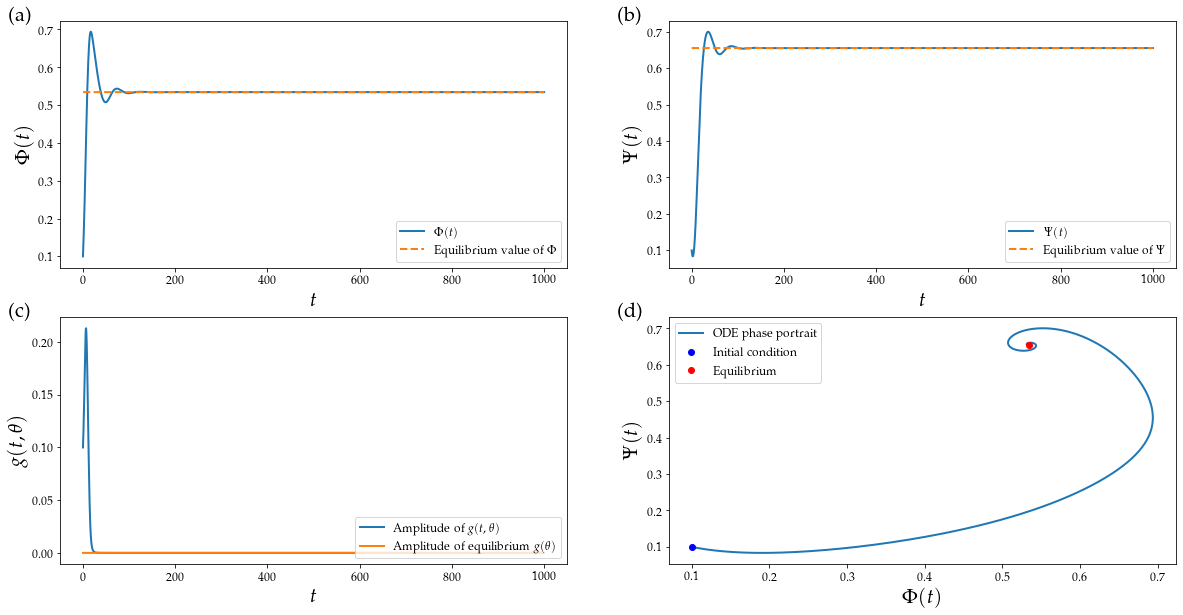

In [17]:
#Stable case (about zero equilibrium)

gamma=0.66             #throttle coefficient
para={'l_c':8,'B':0.5,'H':0.18,'W':0.25, 'm':1.75, 'nu':0.1, 'a':1/3.5}

for iii in range (0,sampleK):
    MG_eq = MG_sim(N,gamma,T,dt,IC[iii],**para)    #Initialize the class MG_Sim    
    [G,Phi,Psi] = MG_eq.Solve()                           #Solve MG model

    if save_data == True:
        with open('MGdata_NT_Stable' + str(iii) + '.pickle', 'wb') as f:
            pickle.dump([G,Phi,Psi,T,N,para,gamma], f)   
        
    if plot_data == True:
        plotMGdata(MG_eq, G, Phi, Psi, False, True, 'MG_stable.pdf')

Delta= 1.1970600009582906
PDE eigenvalue is(-0.03943214553183027-1j)
PDE is stable
ODE eigenvalue is(0.005182051241228409+0.030190782000892646j)
ODE is unstable
Solving MG Model...
Soln Generated
Computation Time: 123.1992678642273 seconds


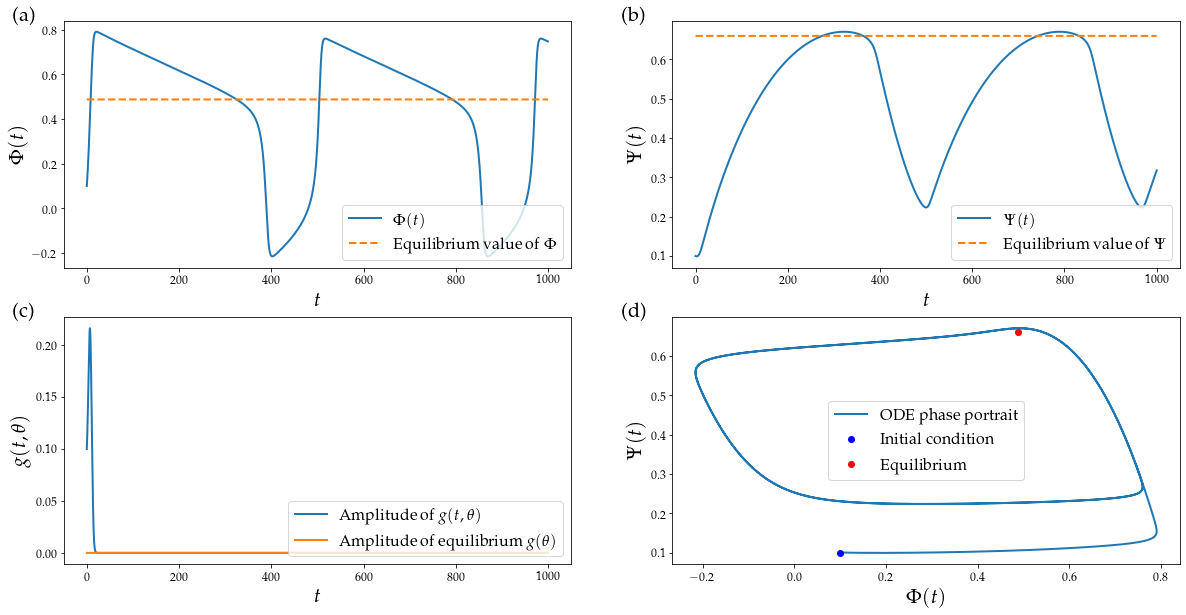

In [20]:
#Surge case (about zero equilibrium)

gamma=0.6             #throttle coefficient
para={'l_c':8,'B':2,'H':0.18,'W':0.25, 'm':1.75, 'nu':0.1, 'a':1/3.5}

for iii in range (0,sampleK):
    MG_eq = MG_sim(N,gamma,T,dt,IC[iii],**para)    #Initialize the class MG_Sim    
    [G,Phi,Psi] = MG_eq.Solve()                           #Solve MG model

    if save_data == True:
        with open('MGdata_NT_Surge' + str(iii) + '.pickle', 'wb') as f:
            pickle.dump([G,Phi,Psi,T,N,para,gamma], f)   
        
    if plot_data == True:
        plotMGdata(MG_eq, G, Phi, Psi, False, True, 'MG_surge.pdf')


Delta= -30.370400316502025
PDE eigenvalue is(0.07710285937007391-1j)
PDE is unstable
ODE eigenvalue is(-0.2252875953570767+0.32233504257720463j)
ODE is stable
Solving MG Model...
Soln Generated
Computation Time: 65.49248266220093 seconds


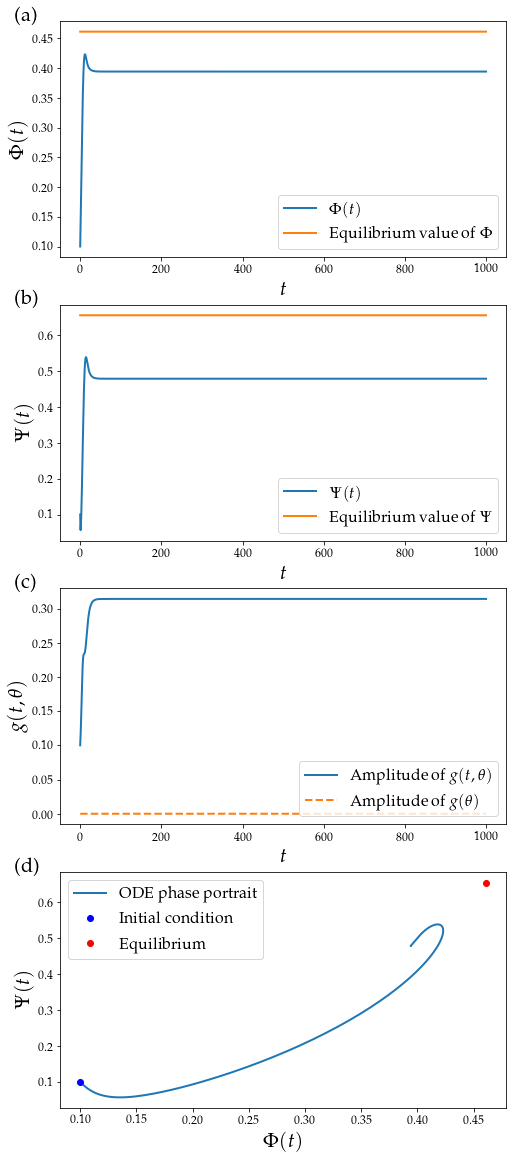

In [7]:
#Stall case (about zero equilibrium)

gamma=0.57         #throttle coefficient (Xiao uses gamma = 0.572)
para={'l_c':8,'B':0.15,'H':0.18,'W':0.25, 'm':1.75, 'nu':0.1, 'a':1/3.5}

for iii in range (0,sampleK):
    MG_eq = MG_sim(N,gamma,T,dt,IC[iii],**para)    #Initialize the class MG_Sim    
    [G,Phi,Psi] = MG_eq.Solve()                           #Solve MG model

    if save_data == True:
        with open('MGdata_NT_Stall' + str(iii) + '.pickle', 'wb') as f:
            pickle.dump([G,Phi,Psi,T,N,para,gamma], f)   
    
    if plot_data == True:
        plotMGdata(MG_eq, G, Phi, Psi, True, False, 'MG_stall.pdf')

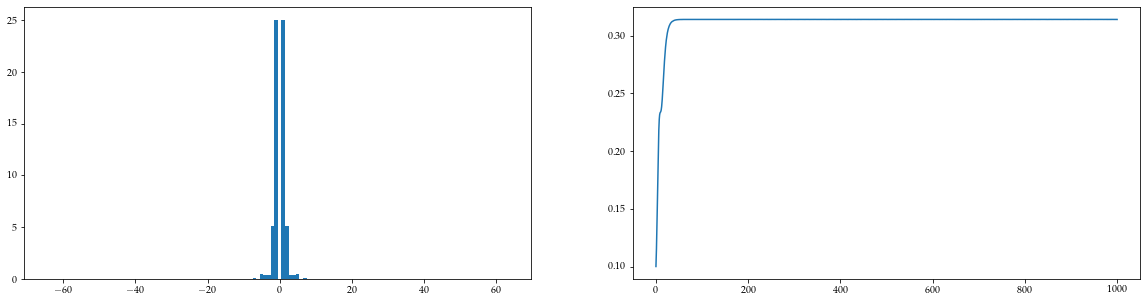

In [49]:
B = 0.15
gamma = 0.57

l_c = 8
H = 0.18
W = 0.25
m = 1.75
nu = 0.1
a = 1/3.5
psi_c0 = 1.67*H

psi_c = lambda x: psi_c0 + H*(1+1.5*(x/W-1)-0.5*(np.power((x/W-1),3)))
psi_c_prime = lambda x: 1.5*(H/W)*(1 - np.power((x/W-1),2))
psi_c_pprime = lambda x: -3*(H/np.power(W,2))*(x/W-1)
psi_c_ppprime = lambda x: -3*H/np.power(W,3)

G_ss = G[9999,:]
t = np.arange(N)
sp = np.fft.fft(G_ss)
freq = np.fft.fftfreq(t.shape[-1])*N

ampG = np.zeros(np.size(MG_eq.t))
for iii in range(0,np.size(MG_eq.t)):
     ampG[iii] = max(G[iii,:])

#plot frequency and amplitude of steady state solution
fig = plt.figure(figsize=(20,5))
gs = gridspec.GridSpec(1,2)
ax = fig.add_subplot(gs[0])
plt.bar(freq, np.abs(sp.real), width=1)
ax = fig.add_subplot(gs[1])
plt.plot(MG_eq.t,ampG)

In [50]:
phi_ss_true = 0.39403382

#accurate
#true value, error = 0%
#G_ss = G[9999,:] 

#use steady state amplitude times a simple waveform, not bad
#found phi_ss = 0.401, error = 1.79%
G_ss = ampG[9999]*np.cos(tht)

G1 = np.sum(MG_eq.dtht*G_ss)/2/np.pi
G2 = np.sum(MG_eq.dtht*G_ss**2)/2/np.pi
G3 = np.sum(MG_eq.dtht*G_ss**3)/2/np.pi

from scipy.optimize import fsolve

fun_ss = lambda x: psi_c(x) + psi_c_pprime(x)*(G2)/2 + psi_c_ppprime(x)*(G3)/6 - (x/gamma)**2
phi_ss = fsolve(fun_ss, 0.4)
psi_ss = (phi_ss/gamma)**2

print(phi_ss)
print(psi_ss)

[0.40109364]
[0.49515576]


Text(0, 0.5, 'Psi')

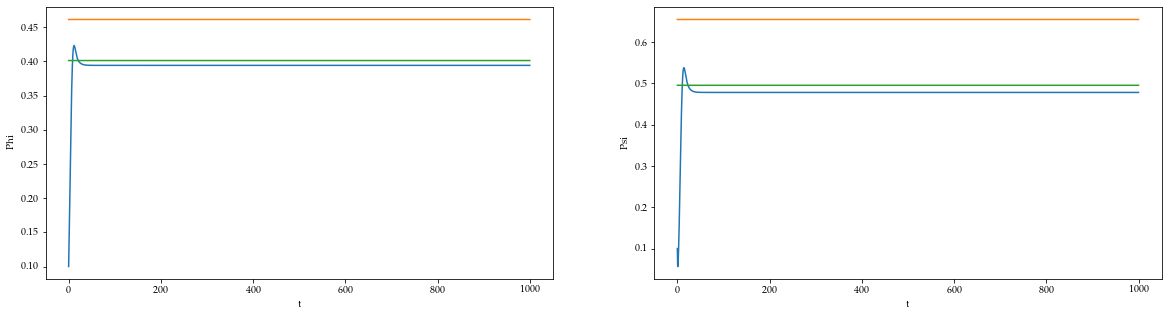

In [51]:
#Compare equilibrium and steady state
fig = plt.figure(figsize=(20,5))
gs = gridspec.GridSpec(1,2)

ax = fig.add_subplot(gs[0])
plt.plot(MG_eq.t,Phi)
plt.plot(MG_eq.t, MG_eq.xec*np.ones(np.shape(MG_eq.t)))
plt.plot(MG_eq.t, phi_ss*np.ones(np.shape(MG_eq.t)))
plt.xlabel('t')
plt.ylabel('Phi')

ax = fig.add_subplot(gs[1])
plt.plot(MG_eq.t,Psi)
plt.plot(MG_eq.t, MG_eq.yec*np.ones(np.shape(MG_eq.t)))
plt.plot(MG_eq.t, psi_ss*np.ones(np.shape(MG_eq.t)))
plt.xlabel('t')
plt.ylabel('Psi')

Delta= 0.661345715244005
PDE eigenvalue is(0.31475556748294015-1j)
PDE is unstable
ODE eigenvalue is(0.04039620012901188+0.03705377212571555j)
ODE is unstable
Solving MG Model...
Soln Generated
Computation Time: 115.63186407089233 seconds


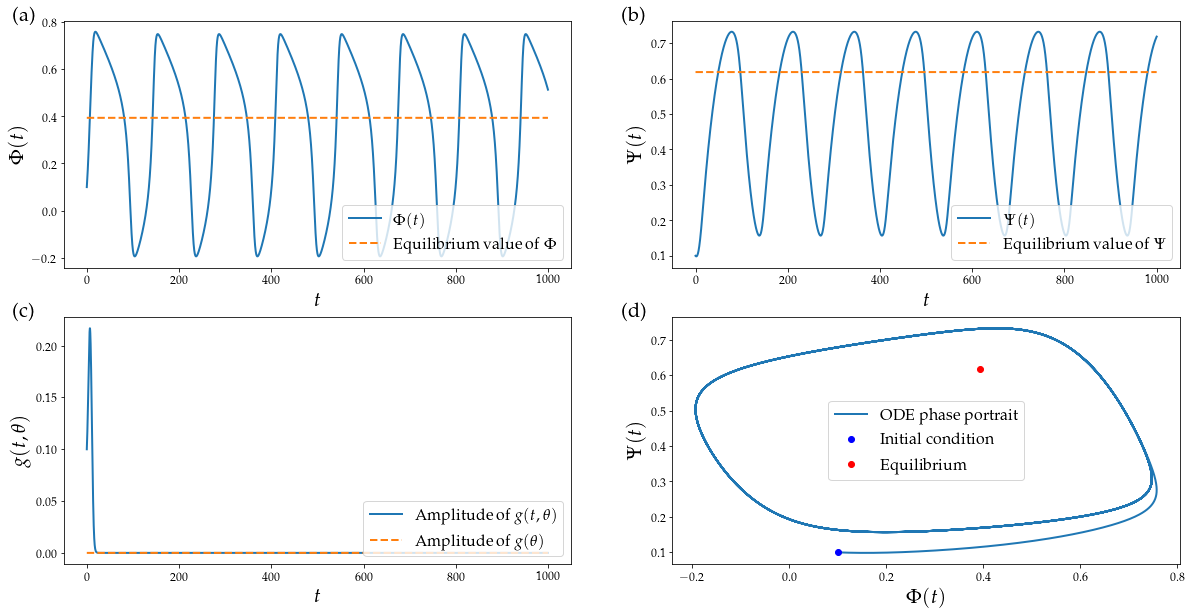

In [21]:
#Combination case (about zero equilibrium)

gamma=0.5             #throttle coefficient
para={'l_c':8,'B':1,'H':0.18,'W':0.25, 'm':1.75, 'nu':0.1, 'a':1/3.5}

for iii in range (0,sampleK):
    MG_eq = MG_sim(N,gamma,T,dt,IC[iii],**para)    #Initialize the class MG_Sim    
    [G,Phi,Psi] = MG_eq.Solve()                           #Solve MG model

    if save_data == True:
        with open('MGdata_NT_Combo' + str(iii) + '.pickle', 'wb') as f:
            pickle.dump([G,Phi,Psi,T,N,para,gamma], f)    
        
    if plot_data == True:
        plotMGdata(MG_eq, G, Phi, Psi, False, False, 'MG_combo.pdf')